# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', eps=0.001):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.eps = eps

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        if self.init == "random":
            centroid_idx = np.random.choice(X.shape[0], size=self.k,
                                            replace=False)
            self.centroids = X[centroid_idx]
        else:
            centroid_idx = np.random.randint(X.shape[0])
            self.centroids[0] = X[centroid_idx]
            for i in range(1, self.k):
                d = pairwise_distances(X, self.centroids,
                                       metric=self.metric).min(axis=1)
                prob = d / d.sum()
                centroid_idx = np.random.choice(X.shape[0], size=1,
                                                replace=False, p=prob)[0]
                self.centroids[i] = X[centroid_idx]
        new_centroids = np.empty((self.k, X.shape[1]))
        for _ in range(self.max_iter):
            self.labels = pairwise_distances(X, self.centroids,
                                             metric=self.metric).argmin(axis=1)
            for i in range(self.k):
                new_centroids[i] = X[np.where(self.labels == i)].mean(axis=0)
            if np.all(np.abs(new_centroids - self.centroids) < self.eps):
                break
            self.centroids = new_centroids
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        return pairwise_distances(X, self.centroids,
                                  metric=self.metric).argmin(axis=1)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', batch_size=100, eps=0.001):
        super().__init__(k=k, metric=metric, max_iter=max_iter,
                         random_state=random_state, init=init, eps=eps)
        self.batch_size = batch_size

    def fit(self, X):
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        if self.init == "random":
            centroid_idx = np.random.choice(X.shape[0], size=self.k,
                                            replace=False)
            self.centroids = X[centroid_idx]
        else:
            centroid_idx = np.random.randint(X.shape[0])
            self.centroids[0] = X[centroid_idx]
            for i in range(1, self.k):
                d = pairwise_distances(X, self.centroids,
                                       metric=self.metric).min(axis=1)
                prob = d / d.sum()
                centroid_idx = np.random.choice(X.shape[0], size=1,
                                                replace=False, p=prob)[0]
                self.centroids[i] = X[centroid_idx]
        new_centroids = np.empty((self.k, X.shape[1]))
        for _ in range(self.max_iter):
            X_batch = X[np.random.choice(X.shape[0],
                                         replace=False,
                                         size=self.batch_size)]
            labs_batch = pairwise_distances(X_batch, self.centroids,
                                            metric=self.metric).argmin(axis=1)
            for i in range(self.k):
                a = X_batch[np.where(labs_batch == i)]
                if len(a) != 0:
                    new_centroids[i] = a.mean(axis=0)
            if np.all(np.abs(new_centroids - self.centroids) < self.eps):
                break
            self.centroids = new_centroids
        self.labels = self.predict(X)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [10]:
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

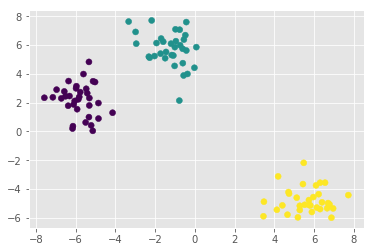

In [12]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

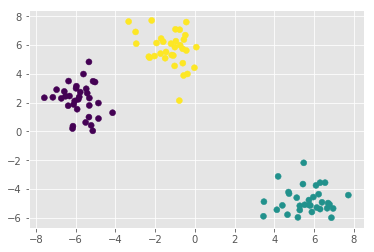

In [14]:
## Работоспособность MyKmeans 
My_Kmeans = MyKmeans(k=3)
My_Kmeans.fit(X)
plt.scatter(X[:,0], X[:, 1], c=My_Kmeans.labels)

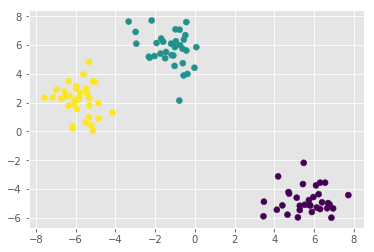

In [15]:
## Работоспособность MyKmeans++
My_Kmeans = MyKmeans(k=3, init = "k-means")
My_Kmeans.fit(X)
plt.scatter(X[:,0], X[:, 1], c=My_Kmeans.labels)

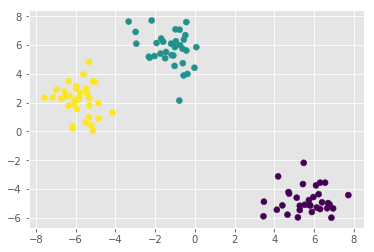

In [16]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
My_Kmeans = MiniBatchKMeans(k=3, batch_size=30)
My_Kmeans.fit(X)
plt.scatter(X[:,0], X[:, 1], c=My_Kmeans.labels)

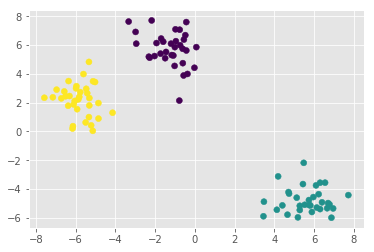

In [17]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
My_Kmeans = MiniBatchKMeans(k=3, init = "k-means", batch_size=30)
My_Kmeans.fit(X)
plt.scatter(X[:,0], X[:, 1], c=My_Kmeans.labels)

In [18]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3, max_iter=1000, precompute_distances=False)
%time clf.fit(X)

Wall time: 18 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances=False,
    random_state=None, tol=0.0001, verbose=0)

In [19]:
## Время выполнения алгоритма MyKmeans
My_Kmeans = MyKmeans(k=3)
%time My_Kmeans.fit(X)

Wall time: 1e+03 µs


In [20]:
## Время выполнения алгоритма MyKmeans++
My_Kmeans = MyKmeans(k=3, init="k-means")
%time My_Kmeans.fit(X)

Wall time: 2 ms


In [21]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
My_Kmeans = MiniBatchKMeans(k=3)
%time My_Kmeans.fit(X)

Wall time: 999 µs


In [22]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
My_Kmeans = MiniBatchKMeans(k=3, init="k-means")
%time My_Kmeans.fit(X)

Wall time: 3 ms


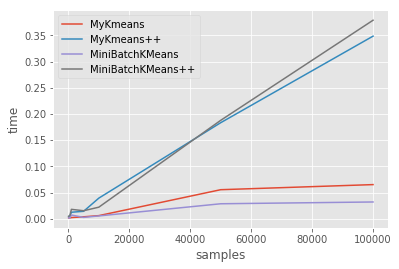

In [24]:
import timeit
sample = [100, 500, 1000, 5000, 10000, 50000, 100000]
algorithm = [MyKmeans(k=10), MyKmeans(k=10, init='k-means'),
             MiniBatchKMeans(k=10), MiniBatchKMeans(k=10, init='k-means')]
time = np.zeros((4,7))
for i, size in enumerate(sample):
    X, y = make_blobs(n_samples=size, n_features=2, centers=10, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    for j, alg in enumerate(algorithm):
        start = timeit.default_timer()
        alg.fit(X)
        time[j][i] = timeit.default_timer() - start

label = ["MyKmeans", "MyKmeans++", "MiniBatchKMeans", "MiniBatchKMeans++"]

for i in range(4):
    plt.plot(sample, time[i], label=label[i])

plt.xlabel("samples")
plt.ylabel("time")
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [25]:
df = pd.read_csv('snsdata.csv', sep=',')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [26]:
df_new = df[df.columns[4:]]
df_new.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [27]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
scaler.fit(df_new)
X = scaler.transform(df_new)

In [28]:
## MyKMeans
My_Kmeans = MyKmeans(k=9)
My_Kmeans.fit(X)
labels = My_Kmeans.labels
df_new['cluster'] = labels
for number_clust in range(9):
    print("Cluster #", number_clust)
    print(df_new[df_new['cluster'] == number_clust][df_new.columns[:-1]].mean().T.sort_values(ascending=False))

Cluster # 0
music           5.358974
hair            1.316239
god             0.880342
band            0.788034
dance           0.782906
sex             0.656410
rock            0.639316
die             0.519658
cute            0.435897
shopping        0.398291
clothes         0.370940
church          0.336752
death           0.302564
kissed          0.299145
sports          0.268376
drugs           0.251282
football        0.244444
soccer          0.225641
basketball      0.223932
mall            0.218803
drunk           0.198291
jesus           0.186325
hot             0.176068
dress           0.176068
blonde          0.169231
sexy            0.160684
tennis          0.148718
swimming        0.147009
softball        0.107692
volleyball      0.095726
baseball        0.087179
cheerleading    0.083761
abercrombie     0.066667
hollister       0.064957
bible           0.051282
marching        0.022222
dtype: float64
Cluster # 1
basketball      1.470588
football        1.282805
dance      

Буду указывать степень выделение предпочтений.
Кластер 0 - Любители музыки (+)  
Кластер 1 - Скорее спорсмены (-+)  
Кластер 2 - Много всего намешано скорее я бы сказал что это рок неформалы (-+)   
Кластер 3 - Любительницы покупок (+-)  
Кластер 4 - Любитель рока (+-)  
Кластер 5 - Игроки в softball (+)  
Кластер 6 - Группа строевой подготовки (+-)  
Кластер 7 - Милые плавцы что-то странное (-)  
Кластер 8 - Всех понемногу (-)
"+" = 1  
"+-" = 0,75   
"-+" = 0,25  
"-" = 0  
Итог 4,75  

In [29]:
## MyKMeans++
My_Kmeans = MyKmeans(k=9, init="k-means")
My_Kmeans.fit(X)
labels = My_Kmeans.labels
df_new['cluster'] = labels
for number_clust in range(9):
    print("Cluster #", number_clust)
    print(df_new[df_new['cluster'] == number_clust][df_new.columns[:-1]].mean().T.sort_values(ascending=False))

Cluster # 0
dance           2.575510
god             2.251020
music           1.119728
hot             1.010884
hair            0.959184
church          0.840816
jesus           0.792517
soccer          0.723810
shopping        0.591156
cute            0.582313
band            0.478912
mall            0.462585
rock            0.424490
basketball      0.402721
football        0.346259
sex             0.338776
clothes         0.325170
dress           0.263946
sexy            0.249660
die             0.239456
cheerleading    0.208163
swimming        0.202721
sports          0.193197
bible           0.179592
blonde          0.174830
death           0.164626
kissed          0.160544
drunk           0.159184
volleyball      0.123810
softball        0.112245
drugs           0.088435
tennis          0.085714
abercrombie     0.080952
baseball        0.076871
hollister       0.072109
marching        0.045578
dtype: float64
Cluster # 1
die             1.473385
music           1.134847
death      

Буду указывать степень выделение предпочтений.
Кластер 0 - В эту группу попали танцоры и верующие (+-)  
Кластер 1 - Депресивные люди (+-)  
Кластер 2 - Содержит много игроков softball(-+)   
Кластер 3 - Любители покупок и бренда hollister (+)  
Кластер 4 - Девушки тусовщицы (+)  
Кластер 5 - Всех по чуть-чуть (-)  
Кластер 6 - Воллейболисты (+)  
Кластер 7 - Преимущественно девушки (-+)  
Кластер 8 - Спортсмены (+-)
"+" = 1  
"+-" = 0,75   
"-+" = 0,25  
"-" = 0  
Итог 5,75  

In [30]:
## MyKMeans с MiniBatchMyKMeans
My_Kmeans = MiniBatchKMeans(k=9, batch_size=5000)
My_Kmeans.fit(X)
labels = My_Kmeans.labels
df_new['cluster'] = labels
for number_clust in range(9):
    print("Cluster #", number_clust)
    print(df_new[df_new['cluster'] == number_clust][df_new.columns[:-1]].mean().T.sort_values(ascending=False))

Cluster # 0
hair            4.073684
music           3.728947
sex             3.236842
rock            2.360526
kissed          2.042105
blonde          1.639474
volleyball      1.607895
cute            1.268421
dance           1.178947
sports          1.123684
band            1.121053
basketball      1.084211
god             1.081579
die             1.015789
football        0.971053
shopping        0.939474
mall            0.900000
clothes         0.894737
drugs           0.815789
drunk           0.723684
soccer          0.621053
softball        0.600000
baseball        0.547368
death           0.544737
dress           0.500000
sexy            0.460526
hollister       0.457895
swimming        0.452632
church          0.439474
abercrombie     0.415789
cheerleading    0.400000
hot             0.394737
tennis          0.257895
jesus           0.152632
marching        0.068421
bible           0.057895
dtype: float64
Cluster # 1
music           0.328453
god             0.203938
dance      

Буду указывать степень выделение предпочтений.
Кластер 0 - Девушки тусовщицы (+)  
Кластер 1 - Всех по чуть-чуть (-) 
Кластер 2 - Преимущественно девушки (-+) 
Кластер 3 - Преимущественно депресивные любители музыки (-+)  
Кластер 4 - Девушки (+-)  
Кластер 5 - тенесисты (+)  
Кластер 6 - плавцы и религиозные люди (-+)  
Кластер 7 - Преимущественно любители музыки и танцев (-+)  
Кластер 8 - Девушки (+-)
"+" = 1  
"+-" = 0,75   
"-+" = 0,25  
"-" = 0  
Итог 4,5  

In [31]:
## MyKMeans++ с MiniBatchMyKMeans
My_Kmeans = MiniBatchKMeans(k=9, batch_size=5000, init="k-means")
My_Kmeans.fit(X)
labels = My_Kmeans.labels
df_new['cluster'] = labels
for number_clust in range(9):
    print("Cluster #", number_clust)
    print(df_new[df_new['cluster'] == number_clust][df_new.columns[:-1]].mean().T.sort_values(ascending=False))

Cluster # 0
volleyball      5.282353
music           0.788235
shopping        0.733333
basketball      0.701961
softball        0.701961
hair            0.643137
dance           0.564706
god             0.560784
cute            0.556863
football        0.529412
mall            0.415686
church          0.415686
soccer          0.372549
sports          0.325490
rock            0.282353
hot             0.235294
swimming        0.231373
sex             0.231373
band            0.211765
clothes         0.207843
cheerleading    0.196078
blonde          0.192157
dress           0.184314
baseball        0.184314
sexy            0.180392
tennis          0.168627
kissed          0.160784
die             0.152941
death           0.137255
jesus           0.129412
hollister       0.105882
abercrombie     0.098039
drunk           0.090196
drugs           0.054902
bible           0.043137
marching        0.027451
dtype: float64
Cluster # 1
sexy            6.383333
music           1.516667
cute       

Буду указывать степень выделение предпочтений.
Кластер 0 - Волейболисты (+)  
Кластер 1 - Суксуальные (+)  
Кластер 2 - Баскетболисты (+)  
Кластер 3 - Баскетболисты но менее выраженые (+-)  
Кластер 4 - Девушки тусовщицы (+)  
Кластер 5 - Футболисты (+)  
Кластер 6 - Любители музыкальных групп (+)  
Кластер 7 - Девушки (+-)  
Кластер 8 - Всех по чуть-чуть (-)  
"+" = 1  
"+-" = 0,75   
"-+" = 0,25  
"-" = 0  
Итог 7,5  

## Вывод
Оценки ставились изходя из моих убеждений как данные параметры определяют группу людей.
Видно что оба алгоритма kmeans++ показали результат лучше чем с параметром random, это логично так как верочтность таких исходов уменьшается (смотрите картинку ниже). Что касаемо почему minibatch отработал лучше, это скорее всего связано с генератором случайность, так как я не фиксировал параметр random_state. Параметр minibatch лишь помогает в случае проблем с оперативной памятью и длительностью вычислений, но в замен мы теряем в точности и может потребоваться больше итераций.

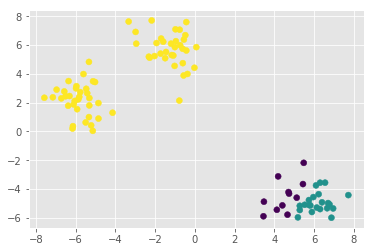

In [34]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
My_Kmeans = MyKmeans(k=3)
My_Kmeans.fit(X)
plt.scatter(X[:,0], X[:, 1], c=My_Kmeans.labels)